# Necessary Imports

In [1]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

<h2>The following function, </h2>

```
# pltDecisionBoundary(my_model, X, y)
```
<h3>Is inspired from <a href="https://cs231n.github.io/neural-networks-case-study/">[HERE]</a></h3>

In [2]:
import numpy as np
def pltDecisionBoundary(my_model, X, y):
    x_min = X[:, 0].min() - 0.1
    x_max = X[:, 0].max() + 0.1
    y_min = X[:, 1].min() - 0.1
    y_max = X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = my_model.predict(x_in)

    if len(y_pred[0])>1:
        print("Multiclass Classification in Process")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Classification in Process")
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=35, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

This function will be used throughout the notebook to plot the built model and analyze the visualized models for better understanding

# Example Dataset Creation

In [3]:
samples = 1000
X, y = make_circles(samples,
                    noise=0.03,
                    random_state=42)
print("These are X Labels:\n", X[:20])
print("#############################")
print("These are y Labels:\n", y[:20])

These are X Labels:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]
 [-0.64249042 -0.54409929]
 [ 0.5694666   0.84476776]
 [-0.11773591  0.83140071]
 [ 0.73410004 -0.33316553]
 [ 0.60077633 -0.58742632]
 [ 0.19022571 -0.76341003]
 [-0.93695185 -0.3434314 ]
 [ 0.1070617  -0.7930922 ]
 [-0.81891362 -0.10162399]
 [-0.64210013 -0.74537441]]
#############################
These are y Labels:
 [1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0]


In [4]:
circles_dataFrame = pd.DataFrame({"X_0":X[:,0], "X_1":X[:,1], "Label":y})
print(circles_dataFrame.head(5));

        X_0       X_1  Label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0


## Dataset Visualization

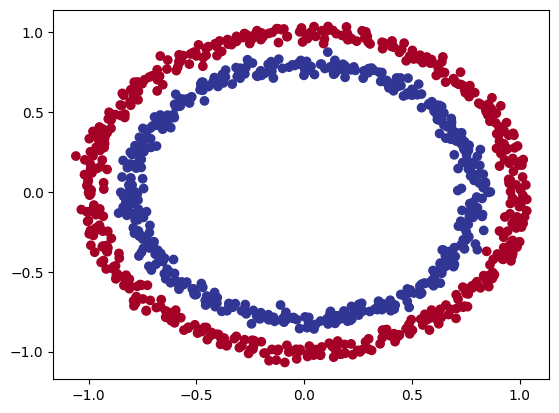

In [5]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Comparing input(X) and output(y)

In [6]:
print(X.shape, y.shape)
print(len(X), len(y))
print(X[0], y[0])

(1000, 2) (1000,)
1000 1000
[0.75424625 0.23148074] 1


## Dataset Train-Test split

In [7]:
X_train, y_train =  X[      :int(0.8*len(X))], y[      :int(0.8*len(y))]
X_test, y_test = X[int(0.8*len(X)):     ], y[int(0.8*len(y)):     ]

print(X_train.shape, y_train.shape,
      X_test.shape, y_test.shape)

(800, 2) (800,) (200, 2) (200,)


# Model Building

Steps:
* Create/import model.
* Compile model.
* Fit the model.
* Evaluate the model.
* Make improvements.
* Evaluate the models again!

## Creating a Model

In [8]:
tf.random.set_seed(42)

my_model = tf.keras.Sequential()
my_model.add(tf.keras.layers.Dense(1))
my_model.add(tf.keras.layers.Dense(1))


my_model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                 optimizer= tf.keras.optimizers.SGD(),
                 metrics= ["accuracy"])

my_model.fit(X_train, y_train, epochs=20)


Epoch 1/20


25/25 [==============================] - 1s 2ms/step - loss: 6.9667 - accuracy: 0.4663
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 6.4822 - accuracy: 0.4963
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 6.5576 - accuracy: 0.4812
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 6.4952 - accuracy: 0.4850
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 5.8116 - accuracy: 0.4850
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 5.7657 - accuracy: 0.5075
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 7.7318 - accuracy: 0.4988
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 7.7318 - accuracy: 0.4988
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 7.7318 - accuracy: 0.4988
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 7.7318 - accuracy: 0.4988
Epoch 11/20
25/2

## Initial improvement of the Model by adding layers in the Neural Network

In [9]:
tf.random.set_seed(42)

my_model_improved = tf.keras.Sequential()
my_model_improved.add(tf.keras.layers.Dense(100))
my_model_improved.add(tf.keras.layers.Dense(10))
my_model_improved.add(tf.keras.layers.Dense(1))

my_model_improved.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["accuracy"])

model_history_0 = my_model_improved.fit(X_train,y_train, epochs=50, verbose=0)

In [10]:
my_model_improved.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (32, 100)                 300       
                                                                 
 dense_3 (Dense)             (32, 10)                  1010      
                                                                 
 dense_4 (Dense)             (32, 1)                   11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
my_model_improved.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.4650


[0.6983148455619812, 0.4650000035762787]

# Visualizing Built Model Prediction

313/313 [==============================] - 1s 1ms/step
Classification in Process


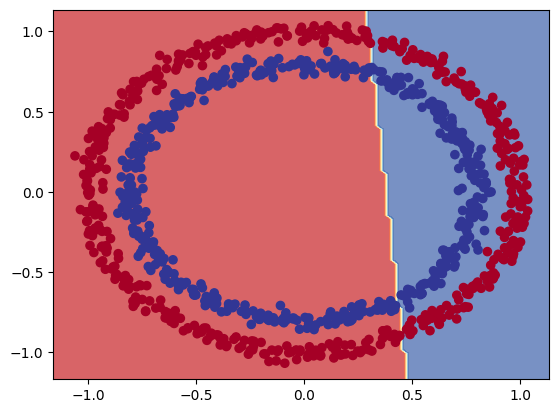

In [12]:
pltDecisionBoundary(my_model_improved, X, y)

# Improved Model - 1

## Building A Non-linear Model

In [13]:
tf. random. set_seed(42)
my_model_imp_1 = tf.keras.Sequential()
my_model_imp_1.add(tf.keras.layers.Dense(1, activation= tf.keras.activations.relu))

my_model_imp_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                           optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                           metrics = ['accuracy'])

model_history_1 = my_model_imp_1.fit(X,y, epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 1ms/step - loss: 5.5077 - accuracy: 0.4830
Epoch 2/50
32/32 [==============================] - 0s 1ms/step - loss: 5.4656 - accuracy: 0.4860
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 5.4127 - accuracy: 0.4830
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 5.4097 - accuracy: 0.4820
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 5.4093 - accuracy: 0.4820
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 5.4090 - accuracy: 0.4820
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 5.4023 - accuracy: 0.4820
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 5.3963 - accuracy: 0.4800
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 5.3950 - accuracy: 0.4810
Epoch 10/50
32/32 [==============================] - 0s 1ms/step - loss: 5.3946 - accuracy: 0.4810
Epoch 11/50
32/32 [

# Improved Model - 2

## Building the model
For more improvement, we will add hidden layers in our model with non-linear activation function. Choosing activation function depends on the datas that is being used for model creation.

In [14]:
tf. random.set_seed(42)
my_model_imp_2 = tf.keras.Sequential()
my_model_imp_2.add(tf.keras.layers.Dense(4, activation="relu"))
my_model_imp_2.add(tf.keras.layers.Dense(4, activation="relu"))
my_model_imp_2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

my_model_imp_2.compile(loss="binary_crossentropy",
                       optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
                       metrics = ["accuracy"])

model_history_2 = my_model_imp_2.fit(X_train,y_train,epochs = 50 )

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.7008 - accuracy: 0.4913
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5150
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.5175
Epoch 4/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5450
Epoch 5/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.5562
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.5537
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.5650
Epoch 8/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5750
Epoch 9/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6634 - accuracy: 0.5863
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.5700
Epoch 11/50
25/25 [

## Model Visualization

This time we are going to plot the model graph for training dataset and testing dataset different for better understanding how the model is training then predicting the test cases.

313/313 [==============================] - 0s 1ms/step
Classification in Process
313/313 [==============================] - 0s 1ms/step
Classification in Process


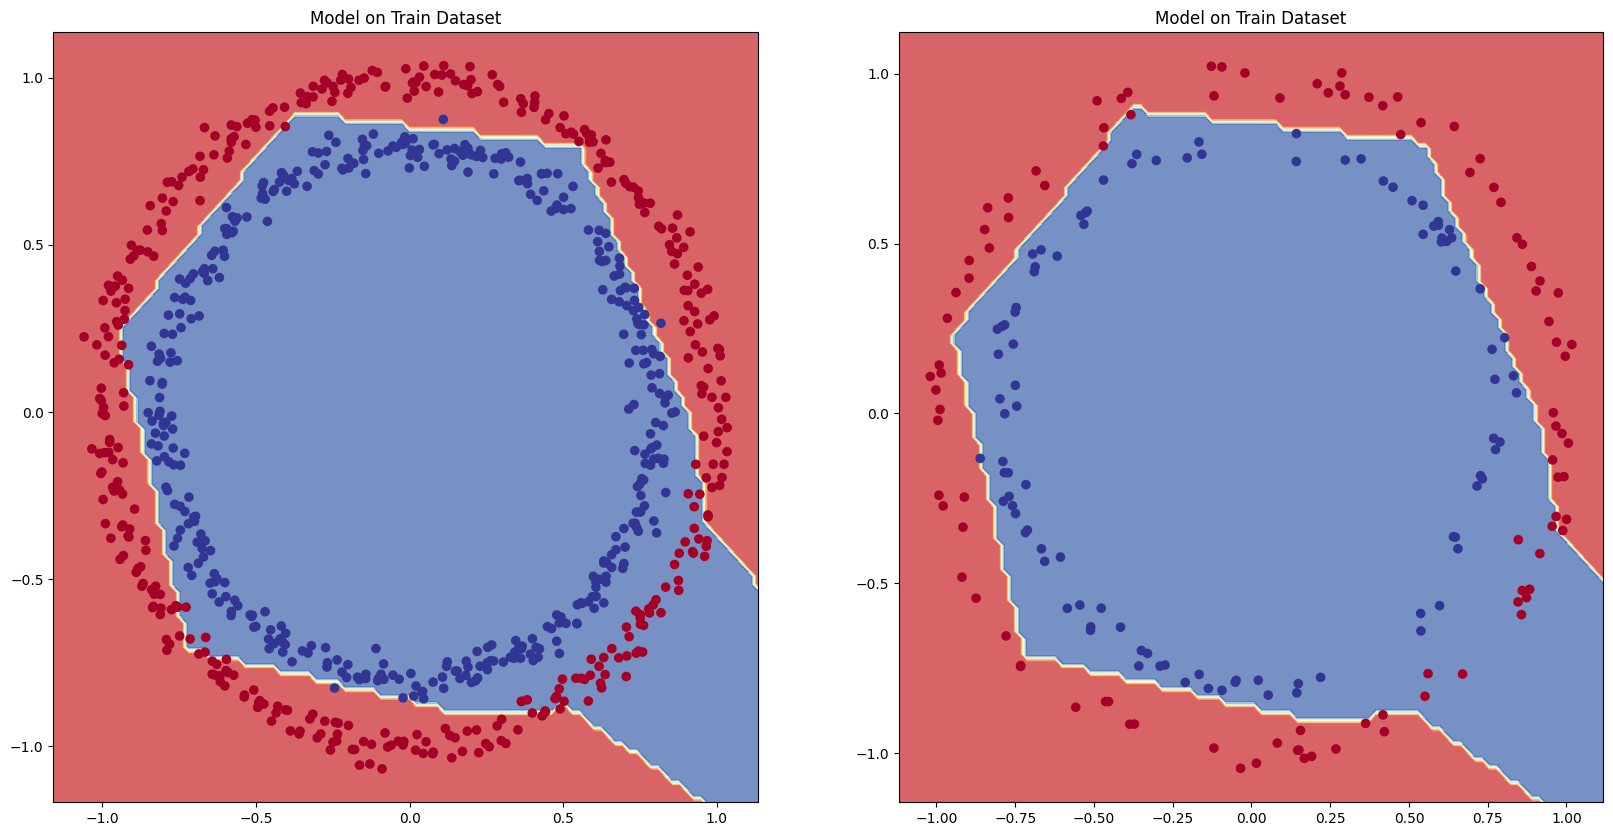

In [15]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title("Model on Train Dataset")
pltDecisionBoundary(my_model_imp_2, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Model on Train Dataset")
pltDecisionBoundary(my_model_imp_2, X_test, y_test)

plt.show();

## Model Evaluation

In [16]:
my_model_imp_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1551 - accuracy: 0.9250


[0.1550842821598053, 0.925000011920929]

This means, our model has an accuracy of almost 100% in this case. As the accuracy increases, the loss gets nearer to "0". From the graph it can be seen that, the model can differentiate between red and blue dots almost perfectly in test dataset.

---

# History

## Model History
The history variable here, keeps the train_loss and train_accuracy values through every epoch while fitting the model. This can be used later for comparison and evaluation purposes.

In [17]:
# Converting to pandas dataframe
history_dataframe_0 = pd.DataFrame(model_history_1.history)
history_dataframe_1 = pd.DataFrame(model_history_1.history)
history_dataframe_2 = pd.DataFrame(model_history_2.history)
print(history_dataframe_0.head(10))
print(history_dataframe_1.head(10))
print(history_dataframe_2.head(10))

       loss  accuracy
0  5.507693     0.483
1  5.465618     0.486
2  5.412694     0.483
3  5.409686     0.482
4  5.409276     0.482
5  5.409033     0.482
6  5.402271     0.482
7  5.396307     0.480
8  5.395020     0.481
9  5.394567     0.481
       loss  accuracy
0  5.507693     0.483
1  5.465618     0.486
2  5.412694     0.483
3  5.409686     0.482
4  5.409276     0.482
5  5.409033     0.482
6  5.402271     0.482
7  5.396307     0.480
8  5.395020     0.481
9  5.394567     0.481
       loss  accuracy
0  0.700756   0.49125
1  0.692706   0.51500
2  0.687760   0.51750
3  0.683037   0.54500
4  0.679565   0.55625
5  0.675719   0.55375
6  0.670008   0.56500
7  0.668105   0.57500
8  0.663392   0.58625
9  0.658067   0.57000


## Plot the loss and accuracy curve

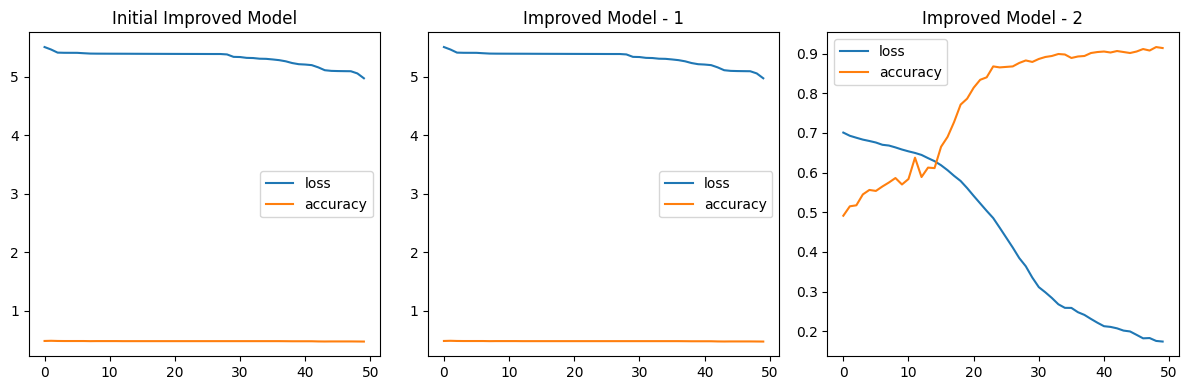

In [18]:
figures, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

history_dataframe_0.plot(ax = axes[0])
axes[0].set_title("Initial Improved Model")

history_dataframe_1.plot(ax = axes[1])
axes[1].set_title("Improved Model - 1")

history_dataframe_2.plot(ax = axes[2])
axes[2].set_title("Improved Model - 2")

plt.tight_layout()
plt.show()

These model loss-accuracy graphs are plotted using the history of models. Observing the graphs, we can see a clear improvement in the last model (Improved Model - 2) as the loss is lower and accuracy is higher compared to the other two models. So, using non-linear activation function and multiple hidden layers worked better in this case.

# Finding the best learning rate

In [30]:
tf.random.set_seed(42)
my_model_3 = tf.keras.Sequential()
my_model_3.add(tf.keras.layers.Dense(4, activation = "relu"))
my_model_3.add(tf.keras.layers.Dense(4, activation = "relu"))
my_model_3.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

my_model_3.compile(loss="binary_crossentropy",
                   optimizer="Adam",
                   metrics=["accuracy"])
#Learning rate Callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
model_history_3 = my_model_3.fit(X_train, y_train, epochs=100,
                                callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.7044 - accuracy: 0.4888 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.4875 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7027 - accuracy: 0.4863 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7018 - accuracy: 0.4850 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7010 - accuracy: 0.4850 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7000 - accuracy: 0.4863 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6991 - accuracy: 0.4875 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.4863 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='Epochs'>

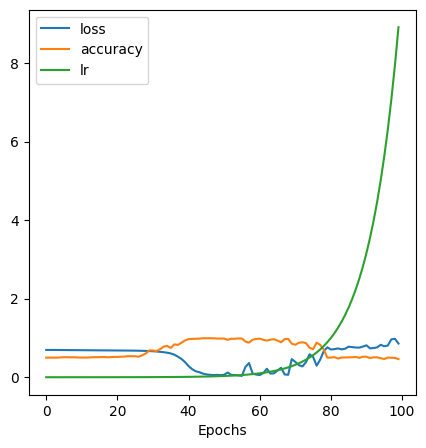

In [31]:
pd.DataFrame(model_2_history.history).plot(figsize=(5,5), xlabel="Epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

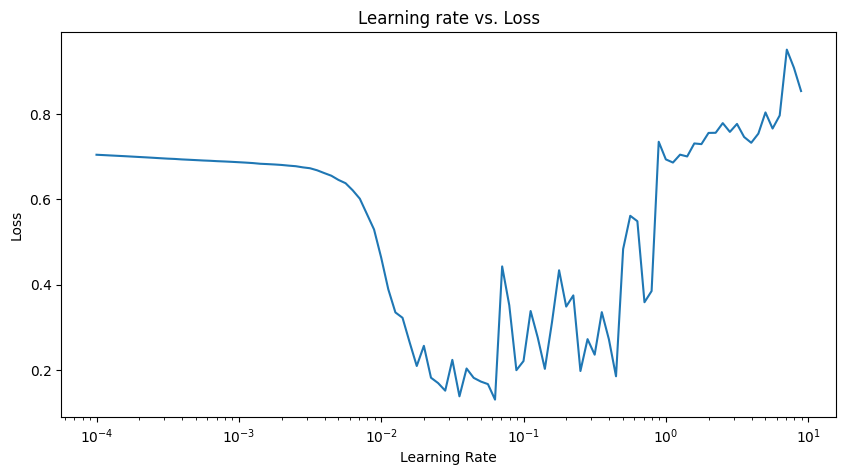

In [35]:
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,5))
plt.semilogx(lrs, model_history_3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")